# **HOME CREDIT SCORECARD MODEL**

A bootcamp project created by Reysadena Anugrah Putri

**Background:**

Home Credit uses various statistical methods and Machine Learning to make credit score predictions. Companies ask to unlock the maximum potential of their data. Doing so will ensure that clients capable of repayment are accepted and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


**Objective:**
1. Identify customers with characteristics of potential clients who have difficulty repaying loans.
2. Predict the client’s repayment abilities.


**Actions:**

- Perform data cleaning, and visualization for business insights.
- Build a models with machine learning algorithms.
- Predict customer's repayment abilities on application data test .
- Provide recommendations for company to increase their clients succeed in applying for loans.

## Data Preparation

In [1]:
#pip install matplotlib --upgrade

In [2]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
import scipy.stats as stats
warnings.filterwarnings('ignore')
import matplotlib 
print('matplotlib: {}'.format(matplotlib.__version__))

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

matplotlib: 3.6.2


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest #feature selection
from sklearn.feature_selection import chi2
from sklearn.utils import resample #re-sampling
from sklearn.model_selection import train_test_split #data splitting
from sklearn.preprocessing import StandardScaler #normalize features

from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.naive_bayes import GaussianNB #gaussian naive bayes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor
from sklearn.neural_network import MLPClassifier #neural network
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_auc_score #roc score

In [4]:
#load dataset

from google.colab import files
uploaded = files.upload()

Saving application_train.csv to application_train.csv


In [5]:
import io

train = pd.read_csv(io.BytesIO(uploaded['application_train.csv']))
print('The dataset has %d rows dan %d columns.' % train.shape)
train.head()

The dataset has 307511 rows dan 122 columns.


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [6]:
train.info(verbose = True, show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

## EDA (Visualization + Insight)

In [7]:
df = train.copy()

### Target

In [8]:
a = df.groupby(['TARGET']).agg({'SK_ID_CURR':'count'}).reset_index()
a['TARGET'] = a['TARGET'].replace({1:'Payment Difficulties',
                                   0:'No Payment Difficulties'})
a.columns = ['TARGET','Numb_target']
a['Ratio'] = (a['Numb_target'] / len(df) * 100.0).round(2)
a

TARGET  Numb_target  Ratio
0  No Payment Difficulties       282686  91.93
1     Payment Difficulties        24825   8.07

[Text(0, 0, '91.93'), Text(0, 0, '8.07')]

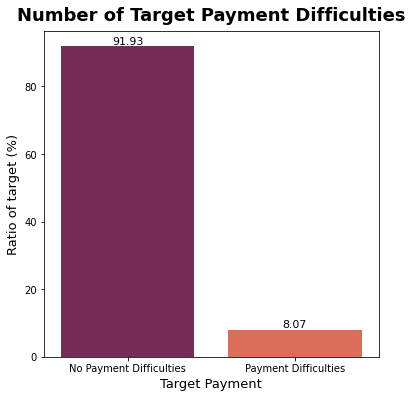

In [9]:
plt.figure(figsize=(6,6))
ax = sns.barplot(data=a, x='TARGET', y='Ratio', palette='rocket')
plt.title('Number of Target Payment Difficulties', color='black',fontsize=18,fontweight='bold', pad=10)
plt.xlabel('Target Payment',fontsize=13);
plt.ylabel('Ratio of target (%)',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.bar_label(ax.containers[0], size=11)

### Bivariate

In [10]:
#grouping data

cats = []
nums = []
for col in df.columns: 
  if df[col].dtype == 'int64' or df[col].dtype == 'float64':
    nums.append(col)
  else:
    cats.append(col)

In [11]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom NAME_CONTRACT_TYPE:
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

Value count kolom CODE_GENDER:
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Value count kolom FLAG_OWN_CAR:
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Value count kolom FLAG_OWN_REALTY:
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

Value count kolom NAME_TYPE_SUITE:
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Value count kolom NAME_INCOME_TYPE:
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Va

In [12]:
#visualization for categorical features
fig = plt.figure(figsize=(80,150))
df['TARGET'] = df['TARGET'].replace({1:'Payment\nDifficulties',
                                     0:'No Payment\nDifficulties'})
for i in range(len(cats)):
    plt.subplot(4, 4, i+1)
    plt.title(cats[i],fontsize=40, weight='bold')
    plt.yticks(fontsize=35, weight='semibold')
    ax = sns.countplot(y=cats[i], data=df, palette='rocket', hue=df['TARGET'],order=df[cats[i]].value_counts().index)
    plt.tight_layout()
    plt.legend(fontsize=35, loc ="lower right")
    plt.bar_label(ax.containers[0], size=30, weight='semibold')

### Multivariate

<Figure size 576x576 with 0 Axes>

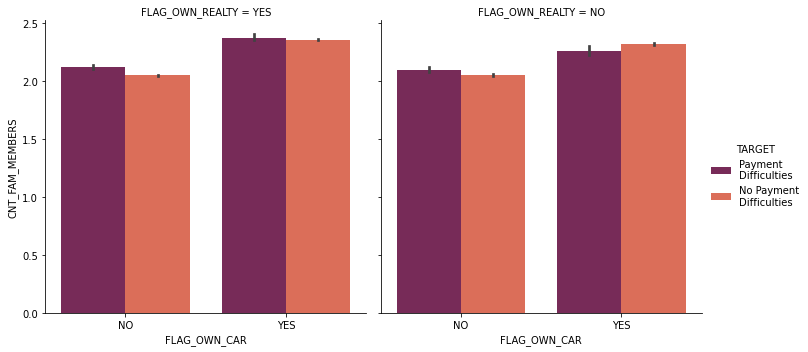

In [13]:
df = df.replace({'N':'NO', 'Y':'YES'})
fig = plt.figure(figsize=(8,8))
ax = sns.catplot(data = df, x = 'FLAG_OWN_CAR',
            y = 'CNT_FAM_MEMBERS', col = 'FLAG_OWN_REALTY', 
            hue = 'TARGET', kind = 'bar', palette = 'rocket',)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.show()

**1).** The customers who have their car and realty or neither mostly have two members in their family. 

<Figure size 576x576 with 0 Axes>

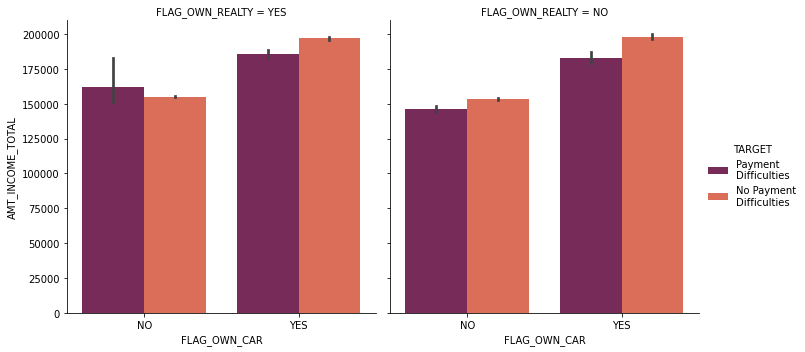

In [14]:
fig = plt.figure(figsize=(8,8))
ax = sns.catplot(data = df, x = 'FLAG_OWN_CAR',
            y = 'AMT_INCOME_TOTAL', col = 'FLAG_OWN_REALTY', 
            hue = 'TARGET', kind = 'bar', palette = 'rocket',)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)

plt.show()

<Figure size 576x576 with 0 Axes>

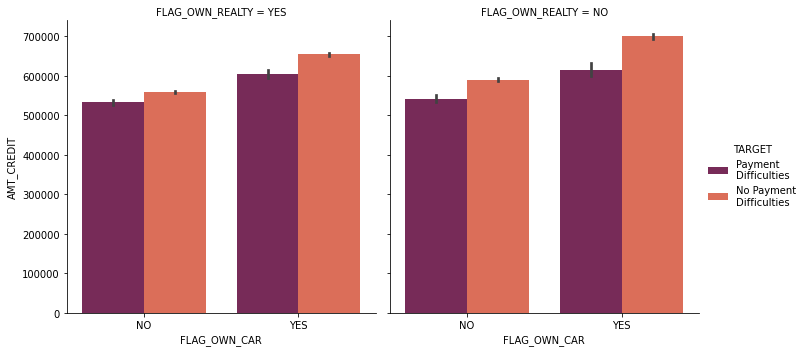

In [15]:
fig = plt.figure(figsize=(8,8))
ax = sns.catplot(data = df, x = 'FLAG_OWN_CAR',
            y = 'AMT_CREDIT', col = 'FLAG_OWN_REALTY', 
            hue = 'TARGET', kind = 'bar', palette = 'rocket',)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.show()

**2).** Customers who have their car have a high amount of income and credit, either have a property or not.

<Figure size 576x576 with 0 Axes>

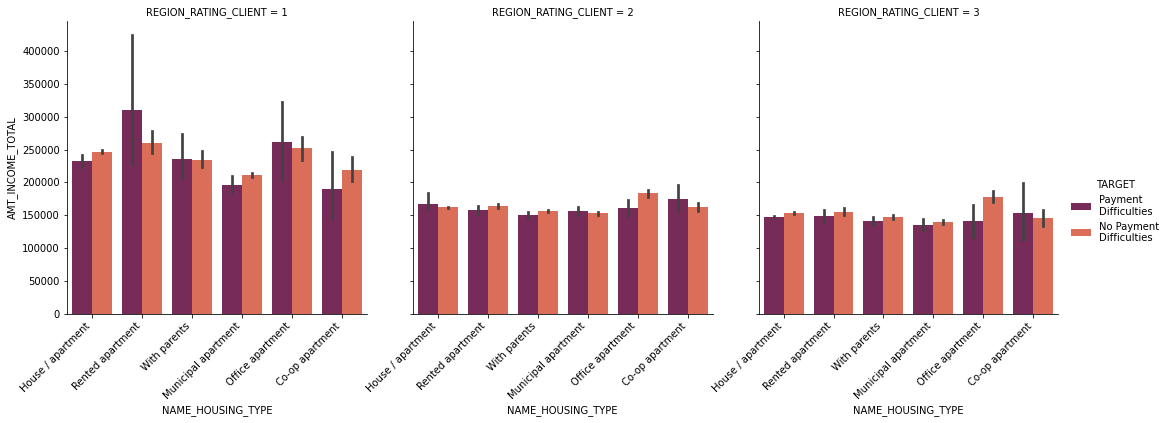

In [16]:
fig = plt.figure(figsize=(8,8))
ax = sns.catplot(data = df, x = 'NAME_HOUSING_TYPE',
            y = 'AMT_INCOME_TOTAL', col = 'REGION_RATING_CLIENT', 
            hue = 'TARGET', kind = 'bar', palette = 'rocket',)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
ax.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

**3).** Customers who live in a rented apartment with the region rating is one has the highest income than others. And turns out they have payment difficulties.

<Figure size 2160x2160 with 0 Axes>

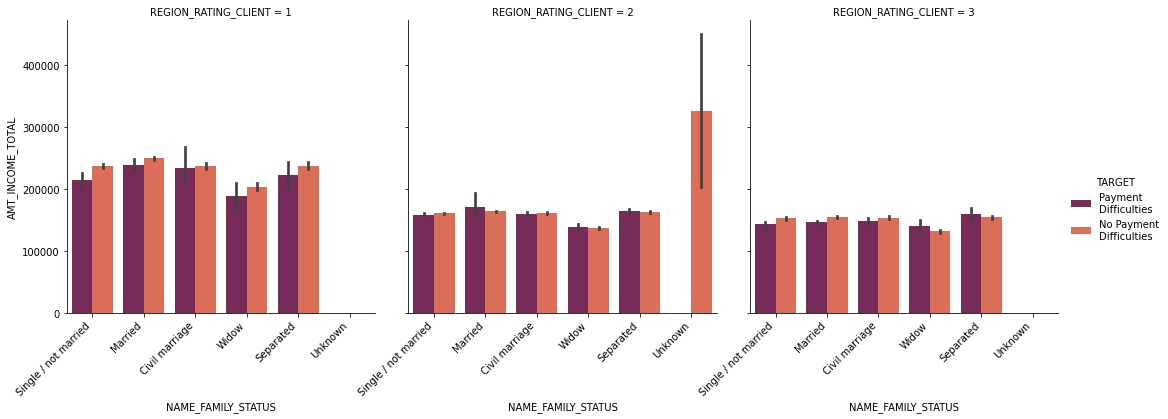

In [17]:
fig = plt.figure(figsize=(30,30))
ax = sns.catplot(data = df, x = 'NAME_FAMILY_STATUS',
            y = 'AMT_INCOME_TOTAL', hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', kind = 'bar', palette = 'rocket',)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
ax.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

**4)** The widow has the lowest income in all the rating of regions.

<Figure size 2160x2160 with 0 Axes>

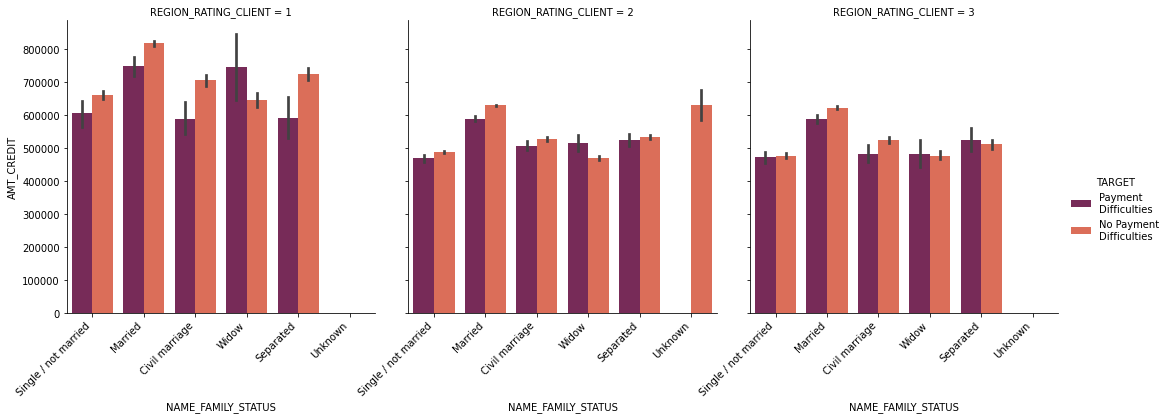

In [18]:
fig = plt.figure(figsize=(30,30))
ax = sns.catplot(data = df, x = 'NAME_FAMILY_STATUS',
            y = 'AMT_CREDIT', hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', kind = 'bar', palette = 'rocket',)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
ax.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

**5)** The married and the widow customers who lived in the region with a rating of one have more credit than others.

**6)** For married customers, they tend to have a higher amount of credit in all the rating regions.

**7)** Then, widow customers with payment difficulties tend to have more credit than no payment difficulties in all the rating regions.

<Figure size 576x576 with 0 Axes>

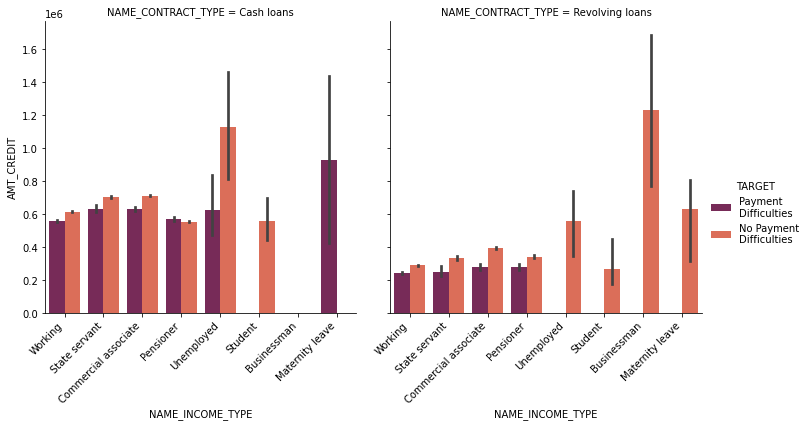

In [19]:
fig = plt.figure(figsize=(8,8))
ax = sns.catplot(data = df, x = 'NAME_INCOME_TYPE',
            y = 'AMT_CREDIT', col = 'NAME_CONTRACT_TYPE', 
            hue = 'TARGET', kind = 'bar', palette = 'rocket',)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
ax.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

**8)** Customers with income type as a student tend to have no payment difficulties with cash or revolving loans. For revolving loans, the credit value is less than for cash loans

**9)** Businessman customers prefer to choose revolving loans with a high amount of credit 

**10)** Unemployed customers also tend to have no payment difficulties, but they prefer cash loans with a high amount of credit

**11)** Customers with income for maternity leave have payment difficulties for cash loans, then for revolving loans, they don't

<Figure size 576x576 with 0 Axes>

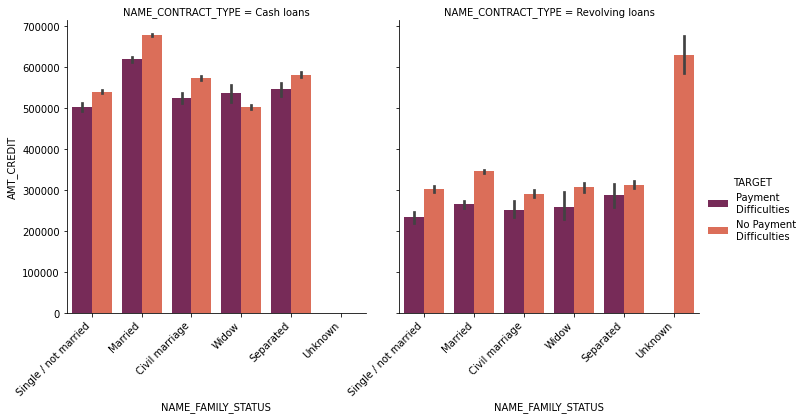

In [20]:
fig = plt.figure(figsize=(8,8))
ax = sns.catplot(data = df, x = 'NAME_FAMILY_STATUS',
            y = 'AMT_CREDIT', col = 'NAME_CONTRACT_TYPE', 
            hue = 'TARGET', kind = 'bar', palette = 'rocket',)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
ax.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

**12)** Customers prefer to choose cash loans for a high amount of credit than revolving. But the widow customers got payment difficulties as the higher amount of credit than no payment difficulties.

## Data Cleaning

In [21]:
dfc = train.copy()

### Duplicated

In [22]:
#check duplicated

dfc.duplicated().sum()

0

### Missing values

In [23]:
#check missing values

miss = pd.DataFrame(dfc.isnull().sum(), columns=['Missing Values'])
miss['Percentage'] = round(((miss['Missing Values']/len(dfc))*100),2)
miss

Missing Values  Percentage
SK_ID_CURR                                 0        0.00
TARGET                                     0        0.00
NAME_CONTRACT_TYPE                         0        0.00
CODE_GENDER                                0        0.00
FLAG_OWN_CAR                               0        0.00
FLAG_OWN_REALTY                            0        0.00
CNT_CHILDREN                               0        0.00
AMT_INCOME_TOTAL                           0        0.00
AMT_CREDIT                                 0        0.00
AMT_ANNUITY                               12        0.00
AMT_GOODS_PRICE                          278        0.09
NAME_TYPE_SUITE                         1292        0.42
NAME_INCOME_TYPE                           0        0.00
NAME_EDUCATION_TYPE                        0        0.00
NAME_FAMILY_STATUS                         0        0.00
NAME_HOUSING_TYPE                          0        0.00
REGION_POPULATION_RELATIVE                 0        0.00
DAYS_BIRTH                                 0        0.00
DAYS_EMPLOYED                              0        0.00
DAYS_REGISTRATION                          0        0.00
DAYS_ID_PUBLISH                            0        0.00
OWN_CAR_AGE                           202929       65.99
FLAG_MOBIL                                 0        0.00
FLAG_EMP_PHONE                             0        0.00
FLAG_WORK_PHONE                            0        0.00
FLAG_CONT_MOBILE                           0        0.00
FLAG_PHONE                                 0        0.00
FLAG_EMAIL                                 0        0.00
OCCUPATION_TYPE                        96391       31.35
CNT_FAM_MEMBERS                            2        0.00
REGION_RATING_CLIENT                       0        0.00
REGION_RATING_CLIENT_W_CITY                0        0.00
WEEKDAY_APPR_PROCESS_START                 0        0.00
HOUR_APPR_PROCESS_START                    0        0.00
REG_REGION_NOT_LIVE_REGION                 0        0.00
REG_REGION_NOT_WORK_REGION                 0        0.00
LIVE_REGION_NOT_WORK_REGION                0        0.00
REG_CITY_NOT_LIVE_CITY                     0        0.00
REG_CITY_NOT_WORK_CITY                     0        0.00
LIVE_CITY_NOT_WORK_CITY                    0        0.00
ORGANIZATION_TYPE                          0        0.00
EXT_SOURCE_1                          173378       56.38
EXT_SOURCE_2                             660        0.21
EXT_SOURCE_3                           60965       19.83
APARTMENTS_AVG                        156061       50.75
BASEMENTAREA_AVG                      179943       58.52
YEARS_BEGINEXPLUATATION_AVG           150007       48.78
YEARS_BUILD_AVG                       204488       66.50
COMMONAREA_AVG                        214865       69.87
ELEVATORS_AVG                         163891       53.30
ENTRANCES_AVG                         154828       50.35
FLOORSMAX_AVG                         153020       49.76
FLOORSMIN_AVG                         208642       67.85
LANDAREA_AVG                          182590       59.38
LIVINGAPARTMENTS_AVG                  210199       68.35
LIVINGAREA_AVG                        154350       50.19
NONLIVINGAPARTMENTS_AVG               213514       69.43
NONLIVINGAREA_AVG                     169682       55.18
APARTMENTS_MODE                       156061       50.75
BASEMENTAREA_MODE                     179943       58.52
YEARS_BEGINEXPLUATATION_MODE          150007       48.78
YEARS_BUILD_MODE                      204488       66.50
COMMONAREA_MODE                       214865       69.87
ELEVATORS_MODE                        163891       53.30
ENTRANCES_MODE                        154828       50.35
FLOORSMAX_MODE                        153020       49.76
FLOORSMIN_MODE                        208642       67.85
LANDAREA_MODE                         182590       59.38
LIVINGAPARTMENTS_MODE                 210199       68.35
LIVINGAREA_MODE                       15

In [24]:
# drop features with of missing values > 40%

dfc.drop(dfc.iloc[:, 44:91], inplace=True, axis=1)
dfc.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)

In [25]:
#check missing values one more time

missed = pd.DataFrame(dfc.isnull().sum(), columns=['Missing Values'])
missed['Percentage'] = round(((missed['Missing Values']/len(dfc))*100),2)
missed

Missing Values  Percentage
SK_ID_CURR                                0        0.00
TARGET                                    0        0.00
NAME_CONTRACT_TYPE                        0        0.00
CODE_GENDER                               0        0.00
FLAG_OWN_CAR                              0        0.00
FLAG_OWN_REALTY                           0        0.00
CNT_CHILDREN                              0        0.00
AMT_INCOME_TOTAL                          0        0.00
AMT_CREDIT                                0        0.00
AMT_ANNUITY                              12        0.00
AMT_GOODS_PRICE                         278        0.09
NAME_TYPE_SUITE                        1292        0.42
NAME_INCOME_TYPE                          0        0.00
NAME_EDUCATION_TYPE                       0        0.00
NAME_FAMILY_STATUS                        0        0.00
NAME_HOUSING_TYPE                         0        0.00
REGION_POPULATION_RELATIVE                0        0.00
DAYS_BIRTH                                0        0.00
DAYS_EMPLOYED                             0        0.00
DAYS_REGISTRATION                         0        0.00
DAYS_ID_PUBLISH                           0        0.00
FLAG_MOBIL                                0        0.00
FLAG_EMP_PHONE                            0        0.00
FLAG_WORK_PHONE                           0        0.00
FLAG_CONT_MOBILE                          0        0.00
FLAG_PHONE                                0        0.00
FLAG_EMAIL                                0        0.00
OCCUPATION_TYPE                       96391       31.35
CNT_FAM_MEMBERS                           2        0.00
REGION_RATING_CLIENT                      0        0.00
REGION_RATING_CLIENT_W_CITY               0        0.00
WEEKDAY_APPR_PROCESS_START                0        0.00
HOUR_APPR_PROCESS_START                   0        0.00
REG_REGION_NOT_LIVE_REGION                0        0.00
REG_REGION_NOT_WORK_REGION                0        0.00
LIVE_REGION_NOT_WORK_REGION               0        0.00
REG_CITY_NOT_LIVE_CITY                    0        0.00
REG_CITY_NOT_WORK_CITY                    0        0.00
LIVE_CITY_NOT_WORK_CITY                   0        0.00
ORGANIZATION_TYPE                         0        0.00
EXT_SOURCE_2                            660        0.21
EXT_SOURCE_3                          60965       19.83
OBS_30_CNT_SOCIAL_CIRCLE               1021        0.33
DEF_30_CNT_SOCIAL_CIRCLE               1021        0.33
OBS_60_CNT_SOCIAL_CIRCLE               1021        0.33
DEF_60_CNT_SOCIAL_CIRCLE               1021        0.33
DAYS_LAST_PHONE_CHANGE                    1        0.00
FLAG_DOCUMENT_2                           0        0.00
FLAG_DOCUMENT_3                           0        0.00
FLAG_DOCUMENT_4                           0        0.00
FLAG_DOCUMENT_5                           0        0.00
FLAG_DOCUMENT_6                           0        0.00
FLAG_DOCUMENT_7                           0        0.00
FLAG_DOCUMENT_8                           0        0.00
FLAG_DOCUMENT_9                           0        0.00
FLAG_DOCUMENT_10                          0        0.00
FLAG_DOCUMENT_11                          0        0.00
FLAG_DOCUMENT_12                          0        0.00
FLAG_DOCUMENT_13                          0        0.00
FLAG_DOCUMENT_14                          0        0.00
FLAG_DOCUMENT_15                          0        0.00
FLAG_DOCUMENT_16                          0        0.00
FLAG_DOCUMENT_17                          0        0.00
FLAG_DOCUMENT_18                          0        0.00
FLAG_DOCUMENT_19                          0        0.00
FLAG_DOCUMENT_20                          0        0.00
FLAG_DOCUMENT_21                          0        0.00
AMT_REQ_CREDIT_BUREAU_HOUR            41519       13.50
AMT_REQ_CREDIT_BUREAU_DAY             41519       13.50
AMT_REQ_CREDIT_BUREAU_WEEK            41519       13.50
AMT_REQ_CREDIT_BUREAU_MON             41519       13.

### Imputation

In [26]:
#grouping data for imputation

cats = []
nums = []
for col in dfc.columns: 
  if df[col].dtype == 'int64' or df[col].dtype == 'float64':
    nums.append(col)
  else:
    cats.append(col)

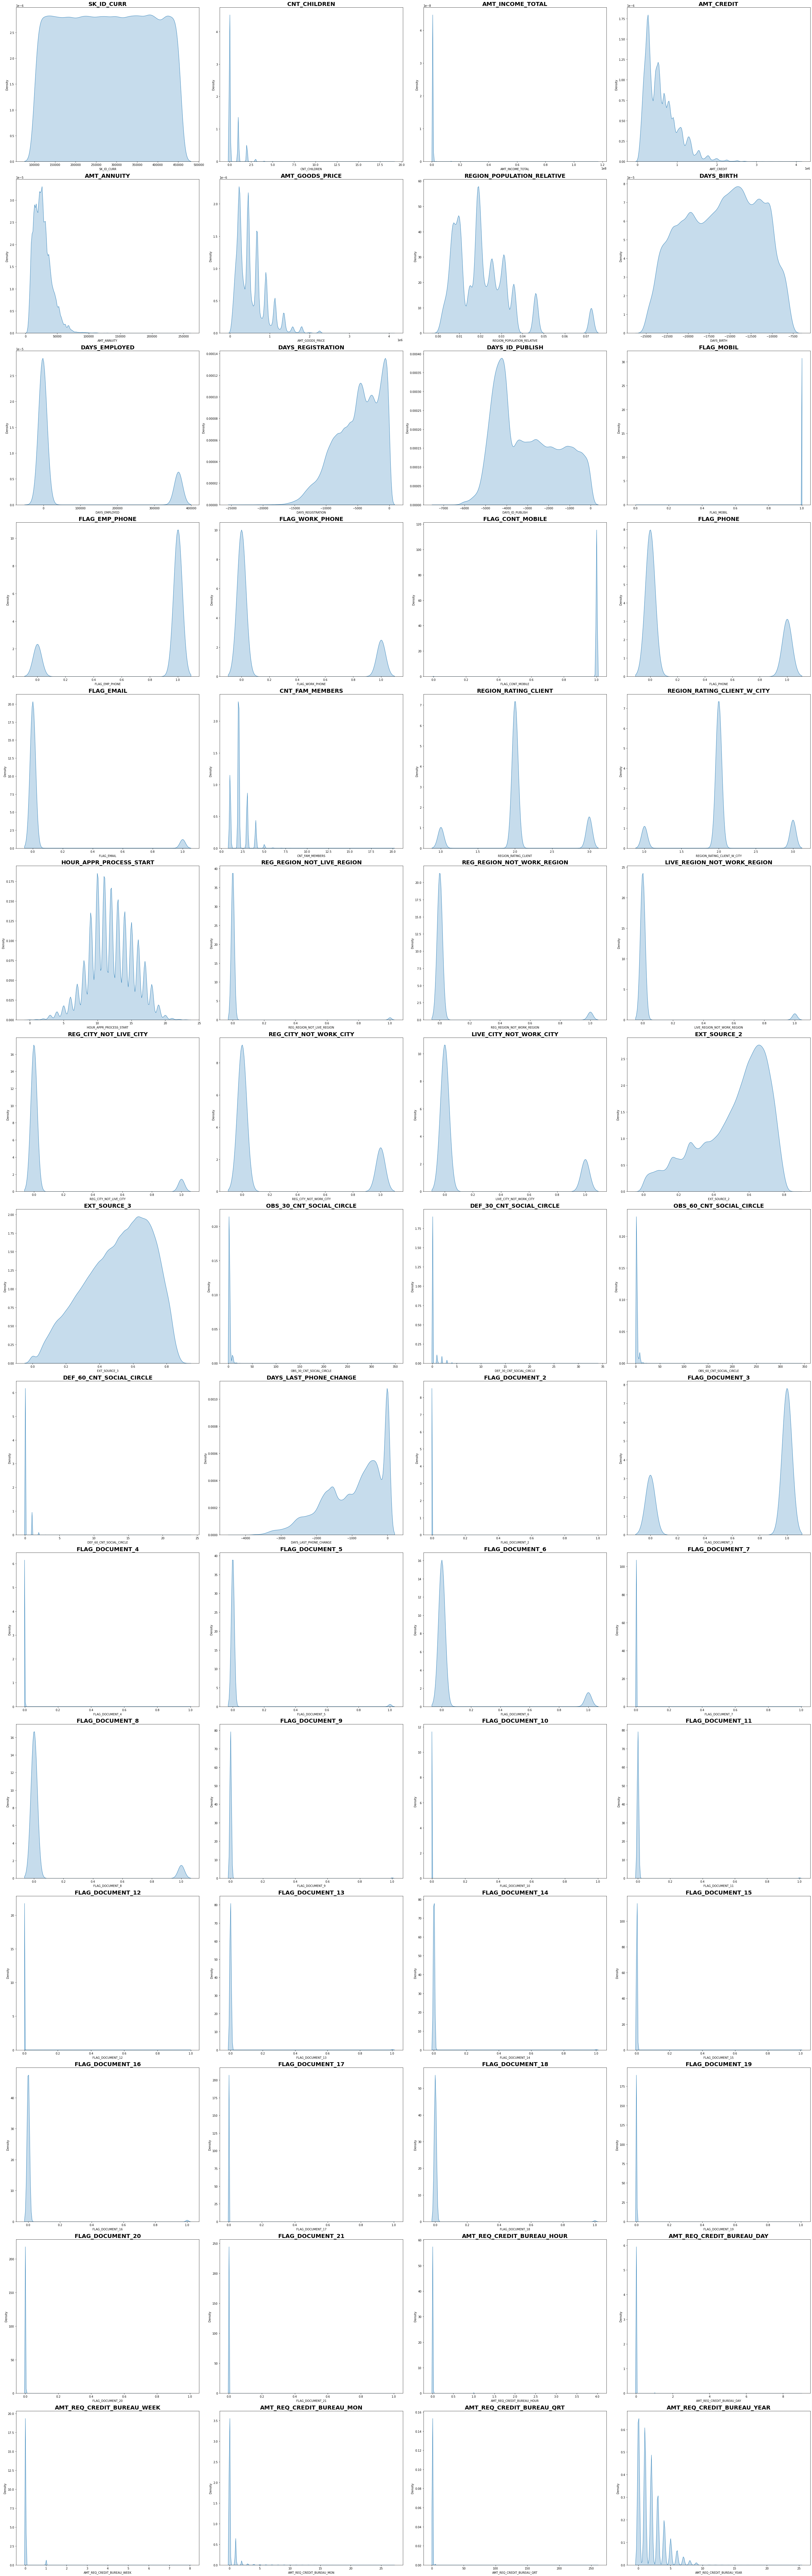

In [27]:
plt.figure(figsize=(40,160))
for i in range(0, len(nums)):
    plt.subplot(19, 4, i+1)
    sns.kdeplot(x=dfc[nums[i]], palette='rocket', shade=True)
    plt.title(nums[i], fontsize=20, weight='semibold')
    plt.tight_layout()

For numerical features with missing values, they mostly have right or positive skewed so that it can be imputed with the median

In [28]:
for column in dfc:
    if dfc[column].isnull().any():
        if(column in cats):
            dfc[column]=dfc[column].fillna(dfc[column].mode()[0])
        else:
            dfc[column]=dfc[column].fillna(dfc[column].median())

In [29]:
#check missing values after imputation

imp = pd.DataFrame(dfc.isnull().sum(), columns=['Missing Values'])
imp['Percentage'] = round(((imp['Missing Values']/len(dfc))*100),2)
imp

Missing Values  Percentage
SK_ID_CURR                                0         0.0
TARGET                                    0         0.0
NAME_CONTRACT_TYPE                        0         0.0
CODE_GENDER                               0         0.0
FLAG_OWN_CAR                              0         0.0
FLAG_OWN_REALTY                           0         0.0
CNT_CHILDREN                              0         0.0
AMT_INCOME_TOTAL                          0         0.0
AMT_CREDIT                                0         0.0
AMT_ANNUITY                               0         0.0
AMT_GOODS_PRICE                           0         0.0
NAME_TYPE_SUITE                           0         0.0
NAME_INCOME_TYPE                          0         0.0
NAME_EDUCATION_TYPE                       0         0.0
NAME_FAMILY_STATUS                        0         0.0
NAME_HOUSING_TYPE                         0         0.0
REGION_POPULATION_RELATIVE                0         0.0
DAYS_BIRTH                                0         0.0
DAYS_EMPLOYED                             0         0.0
DAYS_REGISTRATION                         0         0.0
DAYS_ID_PUBLISH                           0         0.0
FLAG_MOBIL                                0         0.0
FLAG_EMP_PHONE                            0         0.0
FLAG_WORK_PHONE                           0         0.0
FLAG_CONT_MOBILE                          0         0.0
FLAG_PHONE                                0         0.0
FLAG_EMAIL                                0         0.0
OCCUPATION_TYPE                           0         0.0
CNT_FAM_MEMBERS                           0         0.0
REGION_RATING_CLIENT                      0         0.0
REGION_RATING_CLIENT_W_CITY               0         0.0
WEEKDAY_APPR_PROCESS_START                0         0.0
HOUR_APPR_PROCESS_START                   0         0.0
REG_REGION_NOT_LIVE_REGION                0         0.0
REG_REGION_NOT_WORK_REGION                0         0.0
LIVE_REGION_NOT_WORK_REGION               0         0.0
REG_CITY_NOT_LIVE_CITY                    0         0.0
REG_CITY_NOT_WORK_CITY                    0         0.0
LIVE_CITY_NOT_WORK_CITY                   0         0.0
ORGANIZATION_TYPE                         0         0.0
EXT_SOURCE_2                              0         0.0
EXT_SOURCE_3                              0         0.0
OBS_30_CNT_SOCIAL_CIRCLE                  0         0.0
DEF_30_CNT_SOCIAL_CIRCLE                  0         0.0
OBS_60_CNT_SOCIAL_CIRCLE                  0         0.0
DEF_60_CNT_SOCIAL_CIRCLE                  0         0.0
DAYS_LAST_PHONE_CHANGE                    0         0.0
FLAG_DOCUMENT_2                           0         0.0
FLAG_DOCUMENT_3                           0         0.0
FLAG_DOCUMENT_4                           0         0.0
FLAG_DOCUMENT_5                           0         0.0
FLAG_DOCUMENT_6                           0         0.0
FLAG_DOCUMENT_7                           0         0.0
FLAG_DOCUMENT_8                           0         0.0
FLAG_DOCUMENT_9                           0         0.0
FLAG_DOCUMENT_10                          0         0.0
FLAG_DOCUMENT_11                          0         0.0
FLAG_DOCUMENT_12                          0         0.0
FLAG_DOCUMENT_13                          0         0.0
FLAG_DOCUMENT_14                          0         0.0
FLAG_DOCUMENT_15                          0         0.0
FLAG_DOCUMENT_16                          0         0.0
FLAG_DOCUMENT_17                          0         0.0
FLAG_DOCUMENT_18                          0         0.0
FLAG_DOCUMENT_19                          0         0.0
FLAG_DOCUMENT_20                          0         0.0
FLAG_DOCUMENT_21                          0         0.0
AMT_REQ_CREDIT_BUREAU_HOUR                0         0.0
AMT_REQ_CREDIT_BUREAU_DAY                 0         0.0
AMT_REQ_CREDIT_BUREAU_WEEK                0         0.0
AMT_REQ_CREDIT_BUREAU_MON                 0         0

### Outliers

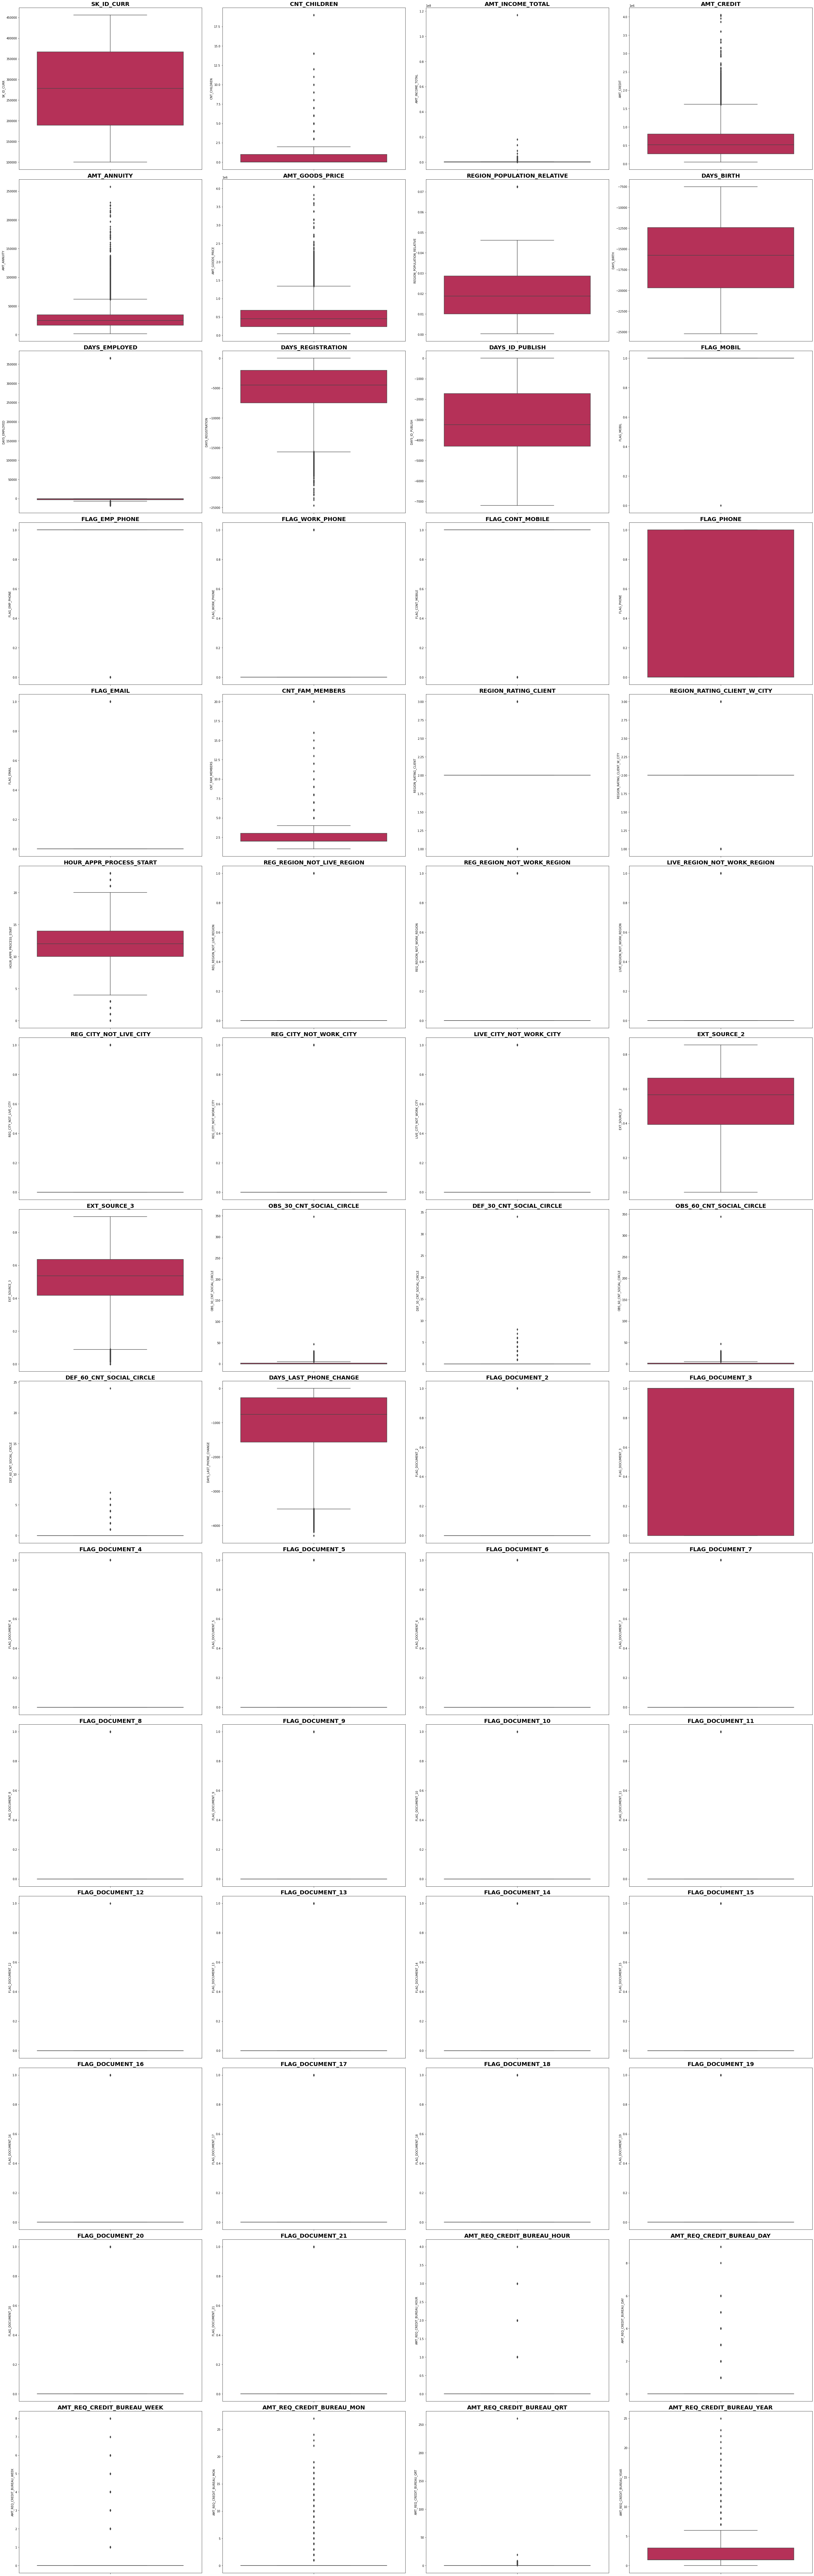

In [30]:
#visualization for numerical features
plt.figure(figsize=(40,160))
for i in range(0, len(nums)):
    plt.subplot(19, 4, i+1)
    sns.boxplot(y=dfc[nums[i]], palette='rocket', orient='v')
    plt.title(nums[i], fontsize=20, weight='semibold')
    plt.tight_layout()

The outliers, keeping like that, will not drop or be removed because the data may have important information or insight shown by outliers.

## Machine Learning Model

### Label Encoding

In [31]:
dfm = dfc.copy()

In [32]:
dfm[['CODE_GENDER', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
     'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
     'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']] = dfm[['CODE_GENDER', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                                                                                                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                                                                                                        'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']].apply(LabelEncoder().fit_transform)

In [33]:
dfm.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            1             0   
1      100003       0                   0            0             0   
2      100004       0                   1            1             1   
3      100006       0                   0            0             0   
4      100007       0                   0            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         351000.0                6                 7                    4   
1        1129500.0                1                 4                    1   
2         135000.0                6                 7                    4   
3         297000.0                6                 7                    4   
4         513000.0                6                 7                    4   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0                   3                  1                    0.018801   
1                   1                  1                    0.003541   
2                   3                  1                    0.010032   
3                   0                  1                    0.008019   
4                   3                  1                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0       -9461           -637            -3648.0            -2120           1   
1      -16765          -1188            -1186.0             -291           1   
2      -19046           -225            -4260.0            -2531           1   
3      -19005          -3039            -9833.0            -2437           1   
4      -19932          -3038            -4311.0            -3458           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                8              1.0                     2   
1                3              2.0                     1   
2                8              1.0                     2   
3                8              2.0                     2   
4                3              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                            2                           6   
1                            1                           1   
2                            2                           1   
3                            2                           6   
4                            2                           4   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                 

### Feature Selection

In [34]:
#drop unecessary feature or column

dfm.drop(['SK_ID_CURR'], inplace=True, axis=1)

In [35]:
#change some features with negative values into positive values
#DAYS_BIRTH, DAYS_EMPLOYED, DAYS_ID_PUBLISH, DAYS_REGISTRATION, and DAYS_LAST_PHONE_CHANGE

dfm.iloc[:,16:20] = dfm.iloc[:,16:20].abs()
dfm.iloc[:,45] = dfm.iloc[:,45].abs()

In [36]:
x = dfm.drop(['TARGET'], axis=1)
y = dfm['TARGET']

In [37]:
#Feature Selection

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Features', 'Score']
print('The features that correlate well with the target feature:\n')
featureScores.sort_values(by=['Score'], ascending=False)

The features that correlate well with the target feature:



Features         Score
16                DAYS_EMPLOYED  1.954124e+08
8               AMT_GOODS_PRICE  1.223080e+08
6                    AMT_CREDIT  7.669987e+07
15                   DAYS_BIRTH  2.235391e+06
5              AMT_INCOME_TOTAL  1.624102e+06
17            DAYS_REGISTRATION  1.348566e+06
44       DAYS_LAST_PHONE_CHANGE  6.656876e+05
18              DAYS_ID_PUBLISH  6.195946e+05
7                   AMT_ANNUITY  3.913092e+05
37            ORGANIZATION_TYPE  4.138607e+03
10             NAME_INCOME_TYPE  9.349036e+02
35       REG_CITY_NOT_WORK_CITY  6.153774e+02
1                   CODE_GENDER  6.056293e+02
38                 EXT_SOURCE_2  5.594802e+02
34       REG_CITY_NOT_LIVE_CITY  5.587089e+02
11          NAME_EDUCATION_TYPE  4.867541e+02
41     DEF_30_CNT_SOCIAL_CIRCLE  4.491174e+02
39                 EXT_SOURCE_3  4.424617e+02
43     DEF_60_CNT_SOCIAL_CIRCLE  3.978737e+02
36      LIVE_CITY_NOT_WORK_CITY  2.667885e+02
0            NAME_CONTRACT_TYPE  2.655883e+02
13            NAME_HOUSING_TYPE  2.564510e+02
49              FLAG_DOCUMENT_6  2.294134e+02
68    AMT_REQ_CREDIT_BUREAU_MON  2.136099e+02
21              FLAG_WORK_PHONE  2.003199e+02
46              FLAG_DOCUMENT_3  1.753636e+02
30      HOUR_APPR_PROCESS_START  1.587742e+02
25              OCCUPATION_TYPE  1.560083e+02
28  REGION_RATING_CLIENT_W_CITY  1.418567e+02
4                  CNT_CHILDREN  1.415500e+02
27         REGION_RATING_CLIENT  1.346770e+02
23                   FLAG_PHONE  1.252946e+02
20               FLAG_EMP_PHONE  1.171062e+02
40     OBS_30_CNT_SOCIAL_CIRCLE  1.113582e+02
42     OBS_60_CNT_SOCIAL_CIRCLE  1.081719e+02
2                  FLAG_OWN_CAR  9.688881e+01
70   AMT_REQ_CREDIT_BUREAU_YEAR  7.971057e+01
56             FLAG_DOCUMENT_13  4.111363e+01
59             FLAG_DOCUMENT_16  4.107157e+01
57             FLAG_DOCUMENT_14  2.746102e+01
69    AMT_REQ_CREDIT_BUREAU_QRT  2.522601e+01
61             FLAG_DOCUMENT_18  1.928903e+01
51              FLAG_DOCUMENT_8  1.826216e+01
32   REG_REGION_NOT_WORK_REGION  1.406664e+01
58             FLAG_DOCUMENT_15  1.311939e+01
9               NAME_TYPE_SUITE  1.280168e+01
26              CNT_FAM_MEMBERS  1.026445e+01
31   REG_REGION_NOT_LIVE_REGION  9.416081e+00
45              FLAG_DOCUMENT_2  9.023668e+00
29   WEEKDAY_APPR_PROCESS_START  7.361672e+00
52              FLAG_DOCUMENT_9  5.802628e+00
54             FLAG_DOCUMENT_11  5.479053e+00
12           NAME_FAMILY_STATUS  4.860928e+00
64             FLAG_DOCUMENT_21  4.228059e+00
14   REGION_POPULATION_RELATIVE  3.906793e+00
3               FLAG_OWN_REALTY  3.560974e+00
60             FLAG_DOCUMENT_17  3.507142e+00
33  LIVE_REGION_NOT_WORK_REGION  2.345155e+00
47              FLAG_DOCUMENT_4  2.195457e+00
66    AMT_REQ_CREDIT_BUREAU_DAY  1.560178e+00
24                   FLAG_EMAIL  8.968679e-01
50              FLAG_DOCUMENT_7  7.098728e-01
67   AMT_REQ_CREDIT_BUREAU_WEEK  6.416067e-01
53             FLAG_DOCUMENT_10  6.147280e-01
62             FLAG_DOCUMENT_19  5.663612e-01
55             FLAG_DOCUMENT_12  1.756366e-01
48              FLAG_DOCUMENT_5  3.020010e-02
63             FLAG_DOCUMENT_20  1.425955e-02
65   AMT_REQ_CREDIT_BUREAU_HOUR  1.832008e-03
22             FLAG_CONT_MOBILE  7.863447e-05
19                   FLAG_MOBIL  2.855786e-07

### Data Imbalance

In [38]:
# create two different dataframe for majority and minority class 
dfmaj = dfm[(dfm['TARGET']==0)] 
dfmin = dfm[(dfm['TARGET']==1)] 

# upsample minority class
df_minority_upsampled = resample(dfmin, 
                                 replace=True,    # sample with replacement
                                 n_samples= 282686, # to match majority class
                                 random_state=42)  # reproducible results

# combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, dfmaj])

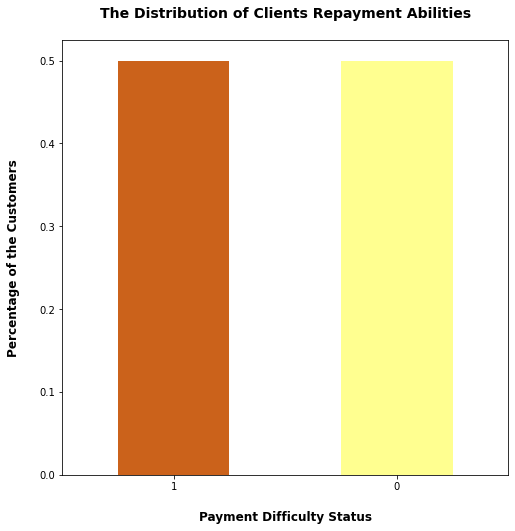

In [42]:
fig = plt.figure(figsize = (8,8))
df_upsampled['TARGET'].value_counts(normalize=True).plot(kind='bar', color=['#c65102','#ffff84'], alpha = 0.9, rot=0)
plt.title('The Distribution of Clients Repayment Abilities\n', fontsize=14, weight='bold')
plt.ylabel('Percentage of the Customers\n', fontsize=12, weight='semibold')
plt.xlabel('\nPayment Difficulty Status', fontsize=12,  weight='semibold')
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.show()

### Split data

In [43]:
# define x and y features (top 20 features)

xx = df_upsampled[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
                  'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 
                  'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 
                  'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                  'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                  'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
yy= df_upsampled['TARGET']

In [44]:
#split the data

X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(452297, 20) (113075, 20)


In [45]:
#normalize features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Modelling


1. Logistic Regression
2. Decision Tree
3. Random Forest

**Logistic Regression**

In [46]:
# train the model
logr_model = LogisticRegression().fit(X_train, y_train)
print(logr_model)

LogisticRegression()


In [48]:
# predict data train
y_train_pred_logr = logr_model.predict(X_train)

# print classification report
print('Classification Report Training Model using Logistic Regression:')
print(classification_report(y_train, y_train_pred_logr))

Classification Report Training Model using Logistic Regression:
              precision    recall  f1-score   support

           0       0.67      0.68      0.68    226185
           1       0.68      0.66      0.67    226112

    accuracy                           0.67    452297
   macro avg       0.67      0.67      0.67    452297
weighted avg       0.67      0.67      0.67    452297



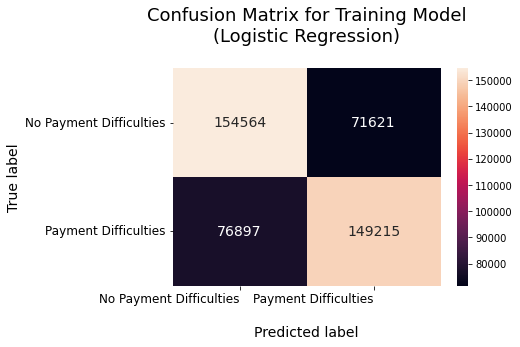

In [51]:
# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_train, y_train_pred_logr)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='rocket')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('\nPredicted label', fontsize=14)
plt.show()

In [53]:
# predict data test
y_test_pred_logr = logr_model.predict(X_test)

# print classification report
print('Classification Report Testing Model using Logistic Regression:')
print(classification_report(y_test, y_test_pred_logr))

Classification Report Testing Model using Logistic Regression:
              precision    recall  f1-score   support

           0       0.67      0.68      0.68     56501
           1       0.68      0.66      0.67     56574

    accuracy                           0.67    113075
   macro avg       0.67      0.67      0.67    113075
weighted avg       0.67      0.67      0.67    113075



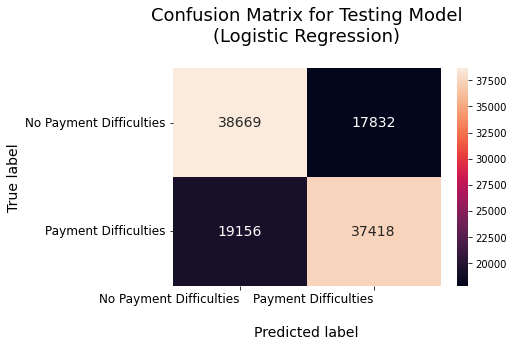

In [54]:
# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_test_pred_logr)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='rocket')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('\nPredicted label', fontsize=14)
plt.show()

In [56]:
acc_log_train=round(logr_model.score(X_train,y_train)*100,2)
acc_log_test=round(logr_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} % ".format(acc_log_train))
print("Test Accuracy: {} %".format(acc_log_test))

Training Accuracy: 67.16 % 
Test Accuracy: 67.29 %


In [80]:
# ROC scores
roc_auc_log = round(roc_auc_score(y_test, y_test_pred_logr),4)
print('ROC AUC:', roc_auc_log)

ROC AUC: 0.6729


**Decission Tree**

In [58]:
# train the model
dtr_model = DecisionTreeClassifier().fit(X_train,y_train)
print(dtr_model)

DecisionTreeClassifier()


In [59]:
# predict data train
y_train_pred_dtr = dtr_model.predict(X_train)

# print classification report
print('Classification Report Training Model using Decision Tree Classifier:')
print(classification_report(y_train, y_train_pred_dtr))

Classification Report Training Model using Decision Tree Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226185
           1       1.00      1.00      1.00    226112

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297



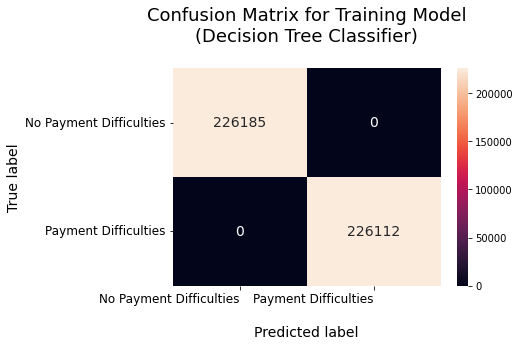

In [61]:
# form confusion matrix as a dataFrame
confusion_matrix_dtr = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dtr)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dtr, annot=True, annot_kws={'size': 14}, fmt='d', cmap='rocket')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Training Model\n(Decision Tree Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('\nPredicted label', fontsize=14)
plt.show()

In [62]:
# predict data test
y_test_pred_dtr = dtr_model.predict(X_test)

# print classification report
print('Classification Report Testing Model using Decision Tree Classifier:')
print(classification_report(y_test, y_test_pred_dtr))

Classification Report Testing Model using Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     56501
           1       0.90      0.86      0.88     56574

    accuracy                           0.88    113075
   macro avg       0.88      0.88      0.88    113075
weighted avg       0.88      0.88      0.88    113075



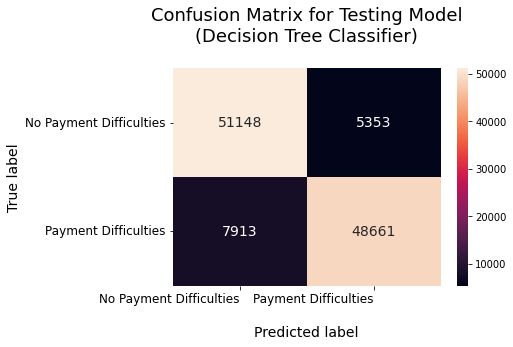

In [63]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_dtr)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='rocket')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('\nPredicted label', fontsize=14)
plt.show()

In [64]:
acc_dt_train=round(dtr_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dtr_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {}%".format(acc_dt_train))
print("Test Accuracy: {}% ".format(acc_dt_test))

Training Accuracy: 100.0%
Test Accuracy: 88.27% 


In [79]:
# ROC scores
roc_auc_dt = round(roc_auc_score(y_test, y_test_pred_dtr),4)
print('ROC AUC:', roc_auc_dt)

ROC AUC: 0.8827


**Random Forest**

In [66]:
# train the model
rft_model = RandomForestClassifier().fit(X_train, y_train)
print(rft_model)

RandomForestClassifier()


In [67]:
# predict data train
y_train_pred_rft = rft_model.predict(X_train)

# print classification report
print('Classification Report Training Model using Random Forest:')
print(classification_report(y_train, y_train_pred_rft))

Classification Report Training Model using Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226185
           1       1.00      1.00      1.00    226112

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297



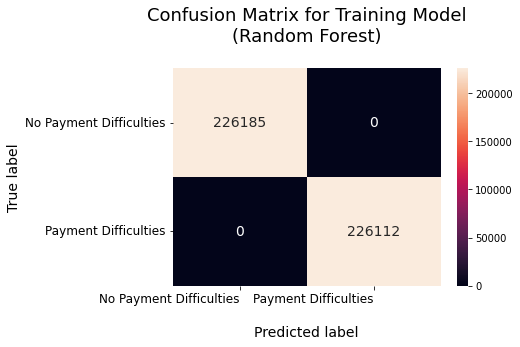

In [68]:
# form confusion matrix as a dataFrame
confusion_matrix_rft = pd.DataFrame((confusion_matrix(y_train, y_train_pred_rft)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rft, annot=True, annot_kws={'size': 14}, fmt='d', cmap='rocket')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Training Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('\nPredicted label', fontsize=14)
plt.show()

In [69]:
# predict data test
y_test_pred_rft = rft_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report

# print classification report
print('Classification Report Testing Model using Random Forest):')
print(classification_report(y_test, y_test_pred_rft))

Classification Report Testing Model using Random Forest):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56501
           1       0.99      1.00      1.00     56574

    accuracy                           1.00    113075
   macro avg       1.00      1.00      1.00    113075
weighted avg       1.00      1.00      1.00    113075



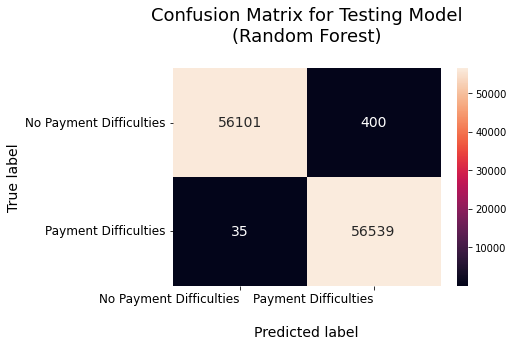

In [70]:
# form confusion matrix as a dataFrame
confusion_matrix_rft = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rft)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rft, annot=True, annot_kws={'size': 14}, fmt='d', cmap='rocket')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('\nPredicted label', fontsize=14)
plt.show()

In [71]:
acc_rft_train=round(rft_model.score(X_train,y_train)*100,2)
acc_rft_test=round(rft_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {}%".format(acc_rft_train))
print("Test Accuracy: {}%".format(acc_rft_test))

Training Accuracy: 100.0%
Test Accuracy: 99.62%


In [78]:
# ROC scores
roc_auc_rft = round(roc_auc_score(y_test, y_test_pred_rft),4)
print('ROC AUC:', roc_auc_rft)

ROC AUC: 0.9962


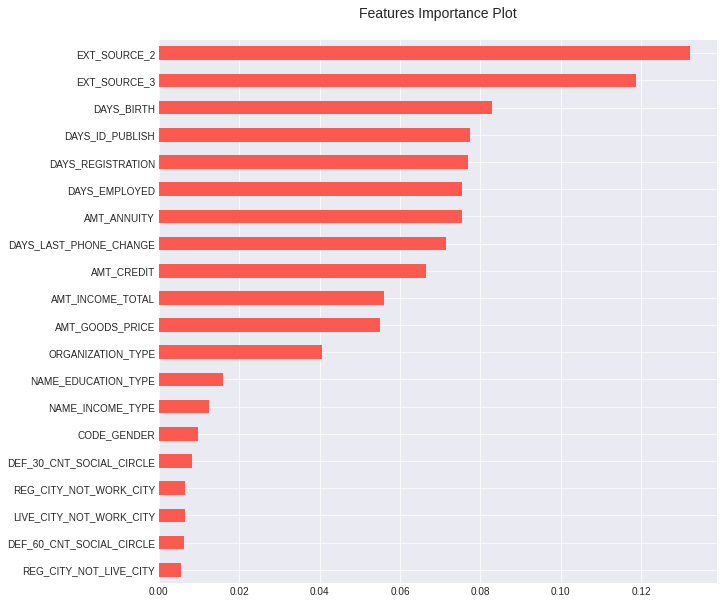

In [76]:
# important features
importances_rft = pd.Series(rft_model.feature_importances_, index=xx.columns).sort_values(ascending=True)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
fig = importances_rft.plot(kind ='barh', color ='#fc5a50')
plt.title('Features Importance Plot\n', fontsize=14)
plt.show()

fig.figure.tight_layout()
fig.figure.savefig('top feature.png')

### Model Selection

In [81]:
df_results = pd.DataFrame([["Logistic Regression", 0.6716, 0.6729, 0.6729],["Decision Tree", 1, 0.8827, 0.8827],["Random Forest", 1, 0.9962, 0.9962]],
                        columns = ["Models", "Training Accuracy Score", "Testing Accuracy Score", "ROC Score"])

df_results.sort_values(by=['Training Accuracy Score', 'Testing Accuracy Score'], ascending=False).style.background_gradient(cmap='rocket')

## Prediction Preparation

In [82]:
#Load dataset

from google.colab import files
uploaded = files.upload()

Saving application_test.csv to application_test.csv


In [83]:
import io

test= pd.read_csv(io.BytesIO(uploaded['application_test.csv']))
print('The dataset has %d rows dan %d columns.' % test.shape)
test.head()

The dataset has 48744 rows dan 121 columns.


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                 NaN              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   

In [84]:
df1= test.copy()

### Duplicated

In [85]:
#check duplicated

df1.duplicated().sum()

0

### Missing values

In [86]:
#check missing values

mvl = pd.DataFrame(df1.isnull().sum(), columns=['Missing Values'])
mvl['Percentage'] = round(((mvl['Missing Values']/len(df1))*100),2)
mvl

Missing Values  Percentage
SK_ID_CURR                                 0        0.00
NAME_CONTRACT_TYPE                         0        0.00
CODE_GENDER                                0        0.00
FLAG_OWN_CAR                               0        0.00
FLAG_OWN_REALTY                            0        0.00
CNT_CHILDREN                               0        0.00
AMT_INCOME_TOTAL                           0        0.00
AMT_CREDIT                                 0        0.00
AMT_ANNUITY                               24        0.05
AMT_GOODS_PRICE                            0        0.00
NAME_TYPE_SUITE                          911        1.87
NAME_INCOME_TYPE                           0        0.00
NAME_EDUCATION_TYPE                        0        0.00
NAME_FAMILY_STATUS                         0        0.00
NAME_HOUSING_TYPE                          0        0.00
REGION_POPULATION_RELATIVE                 0        0.00
DAYS_BIRTH                                 0        0.00
DAYS_EMPLOYED                              0        0.00
DAYS_REGISTRATION                          0        0.00
DAYS_ID_PUBLISH                            0        0.00
OWN_CAR_AGE                            32312       66.29
FLAG_MOBIL                                 0        0.00
FLAG_EMP_PHONE                             0        0.00
FLAG_WORK_PHONE                            0        0.00
FLAG_CONT_MOBILE                           0        0.00
FLAG_PHONE                                 0        0.00
FLAG_EMAIL                                 0        0.00
OCCUPATION_TYPE                        15605       32.01
CNT_FAM_MEMBERS                            0        0.00
REGION_RATING_CLIENT                       0        0.00
REGION_RATING_CLIENT_W_CITY                0        0.00
WEEKDAY_APPR_PROCESS_START                 0        0.00
HOUR_APPR_PROCESS_START                    0        0.00
REG_REGION_NOT_LIVE_REGION                 0        0.00
REG_REGION_NOT_WORK_REGION                 0        0.00
LIVE_REGION_NOT_WORK_REGION                0        0.00
REG_CITY_NOT_LIVE_CITY                     0        0.00
REG_CITY_NOT_WORK_CITY                     0        0.00
LIVE_CITY_NOT_WORK_CITY                    0        0.00
ORGANIZATION_TYPE                          0        0.00
EXT_SOURCE_1                           20532       42.12
EXT_SOURCE_2                               8        0.02
EXT_SOURCE_3                            8668       17.78
APARTMENTS_AVG                         23887       49.01
BASEMENTAREA_AVG                       27641       56.71
YEARS_BEGINEXPLUATATION_AVG            22856       46.89
YEARS_BUILD_AVG                        31818       65.28
COMMONAREA_AVG                         33495       68.72
ELEVATORS_AVG                          25189       51.68
ENTRANCES_AVG                          23579       48.37
FLOORSMAX_AVG                          23321       47.84
FLOORSMIN_AVG                          32466       66.61
LANDAREA_AVG                           28254       57.96
LIVINGAPARTMENTS_AVG                   32780       67.25
LIVINGAREA_AVG                         23552       48.32
NONLIVINGAPARTMENTS_AVG                33347       68.41
NONLIVINGAREA_AVG                      26084       53.51
APARTMENTS_MODE                        23887       49.01
BASEMENTAREA_MODE                      27641       56.71
YEARS_BEGINEXPLUATATION_MODE           22856       46.89
YEARS_BUILD_MODE                       31818       65.28
COMMONAREA_MODE                        33495       68.72
ELEVATORS_MODE                         25189       51.68
ENTRANCES_MODE                         23579       48.37
FLOORSMAX_MODE                         23321       47.84
FLOORSMIN_MODE                         32466       66.61
LANDAREA_MODE                          28254       57.96
LIVINGAPARTMENTS_MODE                  32780       67.25
LIVINGAREA_MODE                        23552       48.32
NONLIVINGAPARTMENTS_MODE               3

In [88]:
# drop features with of missing values > 40%

df1.drop(df1.iloc[:, 43:90], inplace=True, axis=1)
df1.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)

In [90]:
#check missing values one more time

mvls = pd.DataFrame(df1.isnull().sum(), columns=['Missing Values'])
mvls['Percentage'] = round(((mvls['Missing Values']/len(df1))*100),2)
mvls

Missing Values  Percentage
SK_ID_CURR                                0        0.00
NAME_CONTRACT_TYPE                        0        0.00
CODE_GENDER                               0        0.00
FLAG_OWN_CAR                              0        0.00
FLAG_OWN_REALTY                           0        0.00
CNT_CHILDREN                              0        0.00
AMT_INCOME_TOTAL                          0        0.00
AMT_CREDIT                                0        0.00
AMT_ANNUITY                              24        0.05
AMT_GOODS_PRICE                           0        0.00
NAME_TYPE_SUITE                         911        1.87
NAME_INCOME_TYPE                          0        0.00
NAME_EDUCATION_TYPE                       0        0.00
NAME_FAMILY_STATUS                        0        0.00
NAME_HOUSING_TYPE                         0        0.00
REGION_POPULATION_RELATIVE                0        0.00
DAYS_BIRTH                                0        0.00
DAYS_EMPLOYED                             0        0.00
DAYS_REGISTRATION                         0        0.00
DAYS_ID_PUBLISH                           0        0.00
FLAG_MOBIL                                0        0.00
FLAG_EMP_PHONE                            0        0.00
FLAG_WORK_PHONE                           0        0.00
FLAG_CONT_MOBILE                          0        0.00
FLAG_PHONE                                0        0.00
FLAG_EMAIL                                0        0.00
OCCUPATION_TYPE                       15605       32.01
CNT_FAM_MEMBERS                           0        0.00
REGION_RATING_CLIENT                      0        0.00
REGION_RATING_CLIENT_W_CITY               0        0.00
WEEKDAY_APPR_PROCESS_START                0        0.00
HOUR_APPR_PROCESS_START                   0        0.00
REG_REGION_NOT_LIVE_REGION                0        0.00
REG_REGION_NOT_WORK_REGION                0        0.00
LIVE_REGION_NOT_WORK_REGION               0        0.00
REG_CITY_NOT_LIVE_CITY                    0        0.00
REG_CITY_NOT_WORK_CITY                    0        0.00
LIVE_CITY_NOT_WORK_CITY                   0        0.00
ORGANIZATION_TYPE                         0        0.00
EXT_SOURCE_2                              8        0.02
EXT_SOURCE_3                           8668       17.78
OBS_30_CNT_SOCIAL_CIRCLE                 29        0.06
DEF_30_CNT_SOCIAL_CIRCLE                 29        0.06
OBS_60_CNT_SOCIAL_CIRCLE                 29        0.06
DEF_60_CNT_SOCIAL_CIRCLE                 29        0.06
DAYS_LAST_PHONE_CHANGE                    0        0.00
FLAG_DOCUMENT_2                           0        0.00
FLAG_DOCUMENT_3                           0        0.00
FLAG_DOCUMENT_4                           0        0.00
FLAG_DOCUMENT_5                           0        0.00
FLAG_DOCUMENT_6                           0        0.00
FLAG_DOCUMENT_7                           0        0.00
FLAG_DOCUMENT_8                           0        0.00
FLAG_DOCUMENT_9                           0        0.00
FLAG_DOCUMENT_10                          0        0.00
FLAG_DOCUMENT_11                          0        0.00
FLAG_DOCUMENT_12                          0        0.00
FLAG_DOCUMENT_13                          0        0.00
FLAG_DOCUMENT_14                          0        0.00
FLAG_DOCUMENT_15                          0        0.00
FLAG_DOCUMENT_16                          0        0.00
FLAG_DOCUMENT_17                          0        0.00
FLAG_DOCUMENT_18                          0        0.00
FLAG_DOCUMENT_19                          0        0.00
FLAG_DOCUMENT_20                          0        0.00
FLAG_DOCUMENT_21                          0        0.00
AMT_REQ_CREDIT_BUREAU_HOUR             6049       12.41
AMT_REQ_CREDIT_BUREAU_DAY              6049       12.41
AMT_REQ_CREDIT_BUREAU_WEEK             6049       12.41
AMT_REQ_CREDIT_BUREAU_MON              6049       12.41
AMT_REQ_CREDIT_BUREAU_QRT              6049       12.

### Imputation

In [91]:
#grouping data for imputation

cats = []
nums = []
for col in df1.columns: 
  if df1[col].dtype == 'int64' or df1[col].dtype == 'float64':
    nums.append(col)
  else:
    cats.append(col)

In [93]:
for column in df1:
    if df1[column].isnull().any():
        if(column in cats):
            df1[column]=df1[column].fillna(df1[column].mode()[0])
        else:
            df1[column]=df1[column].fillna(df1[column].median())

In [94]:
#check missing values after imputation

imp1 = pd.DataFrame(df1.isnull().sum(), columns=['Missing Values'])
imp1['Percentage'] = round(((imp1['Missing Values']/len(df1))*100),2)
imp1

Missing Values  Percentage
SK_ID_CURR                                0         0.0
NAME_CONTRACT_TYPE                        0         0.0
CODE_GENDER                               0         0.0
FLAG_OWN_CAR                              0         0.0
FLAG_OWN_REALTY                           0         0.0
CNT_CHILDREN                              0         0.0
AMT_INCOME_TOTAL                          0         0.0
AMT_CREDIT                                0         0.0
AMT_ANNUITY                               0         0.0
AMT_GOODS_PRICE                           0         0.0
NAME_TYPE_SUITE                           0         0.0
NAME_INCOME_TYPE                          0         0.0
NAME_EDUCATION_TYPE                       0         0.0
NAME_FAMILY_STATUS                        0         0.0
NAME_HOUSING_TYPE                         0         0.0
REGION_POPULATION_RELATIVE                0         0.0
DAYS_BIRTH                                0         0.0
DAYS_EMPLOYED                             0         0.0
DAYS_REGISTRATION                         0         0.0
DAYS_ID_PUBLISH                           0         0.0
FLAG_MOBIL                                0         0.0
FLAG_EMP_PHONE                            0         0.0
FLAG_WORK_PHONE                           0         0.0
FLAG_CONT_MOBILE                          0         0.0
FLAG_PHONE                                0         0.0
FLAG_EMAIL                                0         0.0
OCCUPATION_TYPE                           0         0.0
CNT_FAM_MEMBERS                           0         0.0
REGION_RATING_CLIENT                      0         0.0
REGION_RATING_CLIENT_W_CITY               0         0.0
WEEKDAY_APPR_PROCESS_START                0         0.0
HOUR_APPR_PROCESS_START                   0         0.0
REG_REGION_NOT_LIVE_REGION                0         0.0
REG_REGION_NOT_WORK_REGION                0         0.0
LIVE_REGION_NOT_WORK_REGION               0         0.0
REG_CITY_NOT_LIVE_CITY                    0         0.0
REG_CITY_NOT_WORK_CITY                    0         0.0
LIVE_CITY_NOT_WORK_CITY                   0         0.0
ORGANIZATION_TYPE                         0         0.0
EXT_SOURCE_2                              0         0.0
EXT_SOURCE_3                              0         0.0
OBS_30_CNT_SOCIAL_CIRCLE                  0         0.0
DEF_30_CNT_SOCIAL_CIRCLE                  0         0.0
OBS_60_CNT_SOCIAL_CIRCLE                  0         0.0
DEF_60_CNT_SOCIAL_CIRCLE                  0         0.0
DAYS_LAST_PHONE_CHANGE                    0         0.0
FLAG_DOCUMENT_2                           0         0.0
FLAG_DOCUMENT_3                           0         0.0
FLAG_DOCUMENT_4                           0         0.0
FLAG_DOCUMENT_5                           0         0.0
FLAG_DOCUMENT_6                           0         0.0
FLAG_DOCUMENT_7                           0         0.0
FLAG_DOCUMENT_8                           0         0.0
FLAG_DOCUMENT_9                           0         0.0
FLAG_DOCUMENT_10                          0         0.0
FLAG_DOCUMENT_11                          0         0.0
FLAG_DOCUMENT_12                          0         0.0
FLAG_DOCUMENT_13                          0         0.0
FLAG_DOCUMENT_14                          0         0.0
FLAG_DOCUMENT_15                          0         0.0
FLAG_DOCUMENT_16                          0         0.0
FLAG_DOCUMENT_17                          0         0.0
FLAG_DOCUMENT_18                          0         0.0
FLAG_DOCUMENT_19                          0         0.0
FLAG_DOCUMENT_20                          0         0.0
FLAG_DOCUMENT_21                          0         0.0
AMT_REQ_CREDIT_BUREAU_HOUR                0         0.0
AMT_REQ_CREDIT_BUREAU_DAY                 0         0.0
AMT_REQ_CREDIT_BUREAU_WEEK                0         0.0
AMT_REQ_CREDIT_BUREAU_MON                 0         0.0
AMT_REQ_CREDIT_BUREAU_QRT                 0         0

### Label Encoding

In [95]:
dfm1 = df1.copy()

In [96]:
dfm1[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
      "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
      "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = dfm1[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
                                                                                                          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
                                                                                                          "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)

In [98]:
dfm1.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100001                   0            0             0                1   
1      100005                   0            1             0                1   
2      100013                   0            1             1                1   
3      100028                   0            0             0                1   
4      100038                   0            1             1                0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                6                 6                    1                   1   
1                6                 6                    4                   1   
2                6                 6                    1                   1   
3                6                 6                    4                   1   
4                6                 6                    4                   1   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  1                    0.018850       19241           2329   
1                  1                    0.035792       18064           4469   
2                  1                    0.019101       20038           4458   
3                  1                    0.026392       13976           1866   
4                  1                    0.010032       13040           2191   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0             5170.0              812           1               1   
1             9118.0             1623           1               1   
2             2175.0             3503           1               1   
3             2000.0             4208           1               1   
4             4000.0             4262           1               1   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  \
0                0                 1           0           1                8   
1                0                 1           0           0                9   
2                0                 1           0           0                4   
3                0                 1           1           0               14   
4                1                 1           0           0                8   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              2.0                     2                            2   
1              2.0                     2                            2   
2              2.0                     2                            2   
3              4.0                     2                            2   
4              3.0                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                           5                       18   
1                           0                        9   
2                           1                       14   
3                           6                       11   
4                           0                        5   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WOR

In [97]:
#change some features with negative values into positive values

dfm1.iloc[:,16:20] = dfm1.iloc[:,16:20].abs()
dfm1.iloc[:,45] = dfm1.iloc[:,45].abs()

### Prediction

In [99]:
pred_test = dfm1[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
                  'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 
                  'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 
                  'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                  'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                  'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
pred_test.head()

DAYS_EMPLOYED  AMT_GOODS_PRICE  AMT_CREDIT  DAYS_BIRTH  AMT_INCOME_TOTAL  \
0           2329         450000.0    568800.0       19241          135000.0   
1           4469         180000.0    222768.0       18064           99000.0   
2           4458         630000.0    663264.0       20038          202500.0   
3           1866        1575000.0   1575000.0       13976          315000.0   
4           2191         625500.0    625500.0       13040          180000.0   

   DAYS_REGISTRATION  DAYS_LAST_PHONE_CHANGE  DAYS_ID_PUBLISH  AMT_ANNUITY  \
0             5170.0                  1740.0              812      20560.5   
1             9118.0                     0.0             1623      17370.0   
2             2175.0                   856.0             3503      69777.0   
3             2000.0                  1805.0             4208      49018.5   
4             4000.0                   821.0             4262      32067.0   

   ORGANIZATION_TYPE  NAME_INCOME_TYPE  REG_CITY_NOT_WORK_CITY  CODE_GENDER  \
0                 28                 6                       0            0   
1                 42                 6                       0            1   
2                 54                 6                       0            1   
3                  5                 6                       0            0   
4                  5                 6                       1            1   

   EXT_SOURCE_2  REG_CITY_NOT_LIVE_CITY  NAME_EDUCATION_TYPE  \
0      0.789654                       0                    1   
1      0.291656                       0                    4   
2      0.699787                       0                    1   
3      0.509677                       0                    4   
4      0.425687                       0                    4   

   DEF_30_CNT_SOCIAL_CIRCLE  EXT_SOURCE_3  DEF_60_CNT_SOCIAL_CIRCLE  \
0                       0.0      0.159520                       0.0   
1                       0.0      0.432962                       0.0   
2                       0.0      0.610991                       0.0   
3                       0.0      0.612704                       0.0   
4                       0.0      0.519097                       0.0   

   LIVE_CITY_NOT_WORK_CITY  
0                        0  
1                        0  
2                        0  
3                        0  
4                        1

In [102]:
# lets predict using random forest
predict = pd.Series(rft_model.predict(pred_test), name = "TARGET").astype(int)
results = pd.concat([dfm1['SK_ID_CURR'], predict],axis = 1)
results.to_csv("predict application.csv", index = False)
results.sample(10)

SK_ID_CURR  TARGET
30334      320568       0
41961      407324       0
9679       170330       0
47390      446464       0
23428      270410       0
35392      359038       0
45220      431107       0
29192      312710       0
1707       112098       0
22106      260583       0

In [105]:
# lets predict using logistic regression
predict1 = pd.Series(logr_model.predict(pred_test), name = "TARGET").astype(int)
results1 = pd.concat([dfm1['SK_ID_CURR'], predict],axis = 1)
results1.to_csv("predict application.csv", index = False)
results1.sample(10)

SK_ID_CURR  TARGET
30238      319877       0
32224      334589       0
3146       122099       0
27192      298286       0
9280       167572       0
32716      338297       0
20835      251196       0
26900      296005       0
24013      274902       0
23003      267260       0

## Recommendation

1. Targetted married customers as a priority because they have a high amount of credit in all the rating region
2. Keep maintaining a good relationship with business people because they have revolving loans with no payment difficulties
3. Doing evaluation properly for the widow customers because they have the lowest income and have a medium amount credit category with payment difficulties